# Introduction

The purpose of the project is to understand the possible serverity of a car accident given the address type, location, road and weather condition, etc. This allow drivers to thoroughly evaluate condition and more careful in situations with high serverity level, reducing collisions, and give government an understanding on what type of road conditions need to be fix or add sign to reduce accident.

The main audience of the project is government, taking the result to further estimate solutions for preventing car accidents. But also for general car drivers to understand how street condition could affect the severity. 

# Data

The collision data is provided by SPD and recorded by Traffic Records. 

The data will be used are:
1. Collision address type: including Alley, Block, and Intersection
2. SEVERITYCODE: 3—fatality
                 2b—serious injury
                 2—injury
                 1—prop damage
                 0—unknown 
3. COLLISIONTYPE: ex. Angles, Sideswipe, Parked Car 
4. WEATHER: weather conditions. ex. Raining, Snowing, cloudy
5. ROADCOND: condition of the road during the collision. ex. wet, dry
6. LIGHTCOND: The light conditions during the collision. ex.Dark - Street Lights On, Daylight

# Methodology

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

## 1.Data Cleaning

In [2]:
df=pd.read_csv("Data Collisions.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
print(df)

        SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... ROADCOND  \
0       3502005  Match

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [1]:
#There are two column named Serveritycode, therefore check whether two columns are exactly the same 

In [6]:
compare_column=np.where(df["SEVERITYCODE"]==df["SEVERITYCODE.1"],True,False)
print(compare_column)

[ True  True  True ...  True  True  True]


In [7]:
unique,frequency=np.unique(compare_column, return_counts=True)
print("unique values:", unique)
print("Counts:", frequency)

unique values: [ True]
Counts: [194673]


In [2]:
#Since column SEVERITYCODE and SEVERITYCODE.1 are the same, delete SEVERITYCODE.1

In [8]:
del df["SEVERITYCODE.1"]

In [9]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
#Check missing data

In [10]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## 2.Data Analysis

### Relationship between ADRTYPE and SERVERITYCODE

In [11]:
ADDRTYPE_Counts=df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
ADDRTYPE_Counts

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='ADDRTYPE', ylabel='count'>

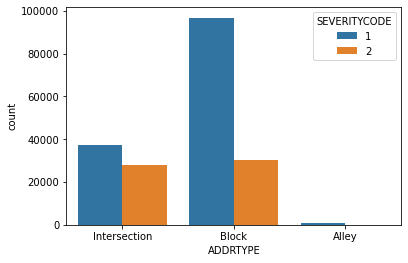

In [13]:
sns.countplot(x="ADDRTYPE", hue="SEVERITYCODE", data=df)

### Relationship between WEATHER and SERVERITYCODE

In [14]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

[Text(0, 0, 'Overcast'),
 Text(1, 0, 'Raining'),
 Text(2, 0, 'Clear'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'Snowing'),
 Text(6, 0, 'Fog/Smog/Smoke'),
 Text(7, 0, 'Sleet/Hail/Freezing Rain'),
 Text(8, 0, 'Blowing Sand/Dirt'),
 Text(9, 0, 'Severe Crosswind'),
 Text(10, 0, 'Partly Cloudy')]

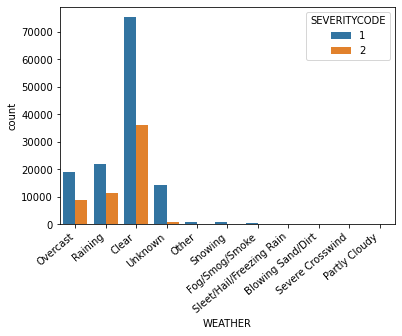

In [15]:
ax=sns.countplot(x="WEATHER", hue="SEVERITYCODE",linewidth=1, data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

### Relationship between COLLISIONTYPE and SERVERITYCODE

[Text(0, 0, 'Angles'),
 Text(1, 0, 'Sideswipe'),
 Text(2, 0, 'Parked Car'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Cycles'),
 Text(5, 0, 'Rear Ended'),
 Text(6, 0, 'Head On'),
 Text(7, 0, 'Left Turn'),
 Text(8, 0, 'Pedestrian'),
 Text(9, 0, 'Right Turn')]

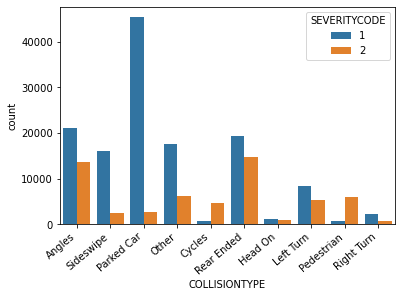

In [16]:
ax=sns.countplot(x="COLLISIONTYPE", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

### Relationship between ROADCOND and SERVERITYCODE

[Text(0, 0, 'Wet'),
 Text(1, 0, 'Dry'),
 Text(2, 0, 'Unknown'),
 Text(3, 0, 'Snow/Slush'),
 Text(4, 0, 'Ice'),
 Text(5, 0, 'Other'),
 Text(6, 0, 'Sand/Mud/Dirt'),
 Text(7, 0, 'Standing Water'),
 Text(8, 0, 'Oil')]

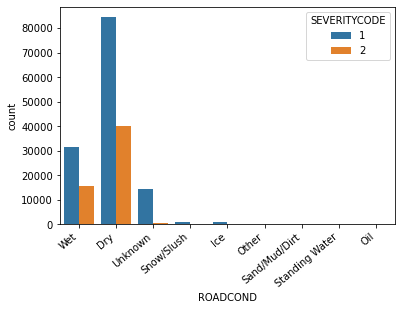

In [17]:
ax=sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

### Relationship between LIGHTCOND and SERVERITYCODE

[Text(0, 0, 'Daylight'),
 Text(1, 0, 'Dark - Street Lights On'),
 Text(2, 0, 'Dark - No Street Lights'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Dusk'),
 Text(5, 0, 'Dawn'),
 Text(6, 0, 'Dark - Street Lights Off'),
 Text(7, 0, 'Other'),
 Text(8, 0, 'Dark - Unknown Lighting')]

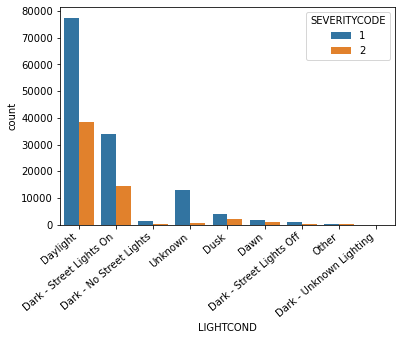

In [18]:
ax=sns.countplot(x="LIGHTCOND", hue="SEVERITYCODE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

## 3.Data Selection

As the purpose for this research is to evlaute the relationship between road condition and collision severity, therefore select variable ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND', which are related to what the research looking for 

In [5]:
#Delet cell missing data

In [19]:
df1=df[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
df1=df1.dropna()

In [6]:
# Delet cell which conditions are unknown

In [20]:
W1 = df1[ df1['WEATHER'] == 'Unknown' ].index
df1.drop(W1 , inplace=True)

In [21]:
df1['WEATHER'].value_counts()

Clear                       110493
Raining                      32969
Overcast                     27545
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [22]:
R1 = df1[ df1['ROADCOND'] == 'Unknown' ].index
df1.drop(R1 , inplace=True)

In [23]:
df1['ROADCOND'].value_counts()

Dry               122911
Wet                46789
Ice                 1121
Snow/Slush           902
Other                111
Standing Water       104
Sand/Mud/Dirt         65
Oil                   61
Name: ROADCOND, dtype: int64

In [24]:
L1 = df1[ df1['LIGHTCOND'] == 'Unknown' ].index
df1.drop(L1 , inplace=True)

In [25]:
df1['LIGHTCOND'].value_counts()

Daylight                    112328
Dark - Street Lights On      46678
Dusk                          5622
Dawn                          2414
Dark - No Street Lights       1407
Dark - Street Lights Off      1112
Other                          194
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

In [26]:
df1

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,Overcast,Wet,Daylight
1,1,Block,Sideswipe,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,Overcast,Dry,Daylight
3,1,Block,Other,Clear,Dry,Daylight
4,2,Intersection,Angles,Raining,Wet,Daylight
...,...,...,...,...,...,...
194668,2,Block,Head On,Clear,Dry,Daylight
194669,1,Block,Rear Ended,Raining,Wet,Daylight
194670,2,Intersection,Left Turn,Clear,Dry,Daylight
194671,2,Intersection,Cycles,Clear,Dry,Dusk


## 4.Pre-Processing

As data type is Str, replace Str with Int

In [27]:
df1['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'], value=[0,1,2],inplace=True)
df1['COLLISIONTYPE'].replace(to_replace=['Angles','Sideswipe','Parked Car','Other','Cycles','Rear Ended','Head On','Left Turn','Pedestrian','Right Turn'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)
df1['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],value=[0,1,2,3,4,5,6,7,8,9],inplace=True)
df1['ROADCOND'].replace(to_replace=['Dry','Wet','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7],inplace=True)
df1['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7],inplace=True)


In [7]:
# 'ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND' are the vriables processing to see the affect to SEVERITYCODE

In [28]:
Feature = df1[['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
X = Feature
X[0:5]

,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,0,2,1,0
1,1,1,1,1,1
2,1,2,2,0,0
3,1,3,0,0,0
4,2,0,1,1,0


In [29]:
y = df1['SEVERITYCODE'].values
y[0:5]                                 


array([2, 1, 1, 1, 2])

## 5.Model

In [9]:
# Split data set into train set and test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135811, 5) (135811,)
Test set: (33953, 5) (33953,)


### DecisionTree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
STree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
STree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
STree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
predTree = STree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 2 1 1 1]
[1 2 1 1 1]


In [34]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.7256796159396813


In [37]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

### 5.2K Nearest Neighbor(KNN) Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
      
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66804112, 0.70093953, 0.6909846 , 0.712426  , 0.70167585,
       0.71260272, 0.69472506, 0.69661002, 0.69169146])

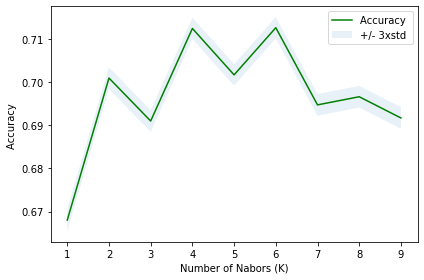

The best accuracy was with 0.7126027155185108 with k= 6


In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
